# <font color='red'>Import the usual packages. <font>

In [3]:
import numpy as np # Import numpy package.
from matplotlib import pyplot as plt # Import PLOTTING package.
from scipy.linalg import expm # Import exponential of a matrix function, which we will use a lot...

# <font color='red'> Newton Raphson Method <font>

## The equation for the Newton Raphson Update is 
# $x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}$

In [4]:
def Newton_Raphson(x,ε,f):
    df=(f(x+ε)-f(x))/ε  # Derivative of the function, approximated by a discrete step ε.
    return x-f(x)/(df+0*10**(-9)) # standard way of catching errors due to df=0

In [5]:
x=Newton_Raphson(1e-1,1e-5,np.sin)
print(x)

-0.0003347224223484435


In [6]:
def mexican_hat(x):
    return -x**2+x**4 

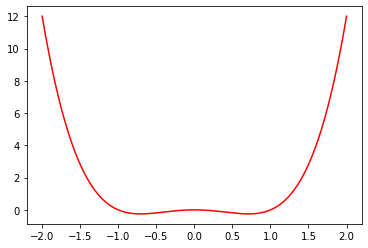

In [11]:
t=np.linspace(-2,2,1000)
plt.plot(t,mexican_hat(t),'r-')

In [13]:
x=np.zeros(1500)
x[0]=10*np.random.rand()
for i in range(len(x)-1):
    x[i+1]=Newton_Raphson(x[i],1e-1,mexican_hat)

array([7.69202334e-02, 5.28536242e-02, 3.89478098e-02, ...,
       6.63858603e-05, 6.63414028e-05, 6.62970047e-05])

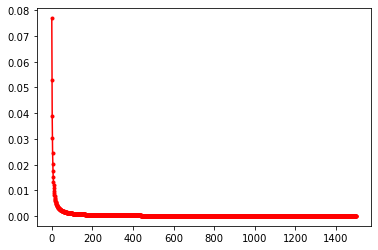

In [14]:
plt.plot(x,'r.-')
x

# <font color='red'>Euler Method<font>

In [16]:
def MY_Euler(f,y_init,t0,tf,n_times):
    t=np.linspace(t0,tf,n_times)
    y = np.zeros(n_times)
    y[0] = y_init
    δ=t[1]-t[0]
    for k in range(n_times-1):
        y[k+1] = y[k] + f(y[k],t[k])*δ
    return y

In [17]:
def simple(y,t):
    return y

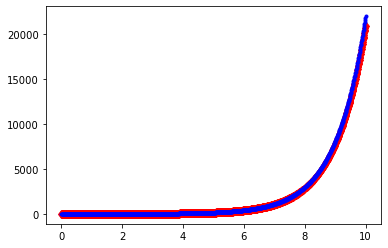

In [21]:
a,b,c = 0,10,1000

z = MY_Euler(simple,1,a,b,c)

t = np.linspace(a,b,c)
plt.plot(t,z,'rd-',t,np.exp(t),'b.')

# <font color='red'>Simple Harmonic Oscillator <font>

## Consider where we always start physics discussions, namely with the harmonic oscillator.
### The equation of motion for the harmonic oscillator is $\ddot{x}+\omega^2 x=0$
### This can be written as a pair of first order ODEs, namely $\dot{x}=p/m$ and $\dot{p}=-m\omega^2 x$.


### Lets code this up using a "function definition"

In [22]:
def Simple_Evolve_SHO(x,p,δt,m,ω): # Returns ẋ and ṗ for SHO.
    dx = (p/m)*δt # xdot is discretized to first order.
    dp = -m*(ω**2)*x*δt # likewise pdot.
    return x+dx,p+dp

In [23]:
x,p=Simple_Evolve_SHO(1,1,1e-5,1,1)
x,p

(1.00001, 0.99999)

In [24]:
times = 10**6 # total number of timesteps I need to take.
m=1
ω=np.pi/5
dt=1e-5

x = np.zeros(times) # Construct some empty arrays to put your results...
p = np.zeros(times) # Construct some empty arrays to put your results...

x[0] =  0 # dont forget to give your system some initial potential/kinetic energy...otherwise it does nothing
p[0] = -1 # dont forget to give your system some initial potential/kinetic energy...otherwise it does nothing

for i in range(times-1):
    x[i+1],p[i+1]=Simple_Evolve_SHO(x[i],p[i],1e-5,m,ω)
    

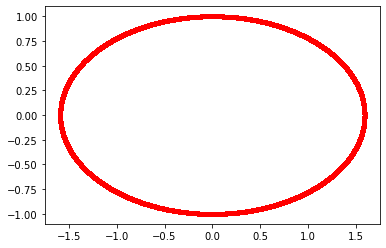

In [25]:
plt.plot(x,p,'r.-')

# <font color='red'> Foucault Pendulum <font>

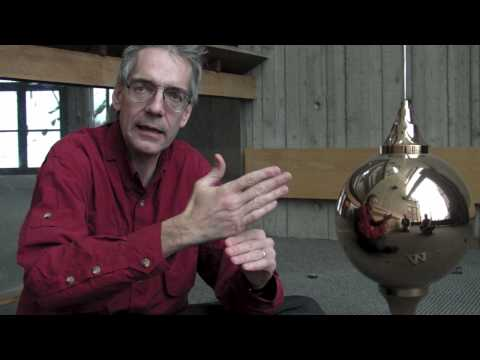

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('aMxLVDuf4VY')

# The equations of motion of a Foucault Pendulum are given by

# $\ddot{z}+2j\Omega\dot{z}\sin(\varphi)+\omega^2 z=0$

In [27]:
def Foucault(z,w,δt,Ω,ω,φ): # Returns ẋ and ṗ for SHO.
    dz = w*δt # xdot is discretized to first order.
    dw = (-2j*Ω*w*np.sin(φ)-(ω**2)*z)*δt # likewise pdot.
    return z+dz,w+dw

In [28]:
times = 10**6 # total number of timesteps I need to take.
Ω  = np.pi/5
ω  = np.pi/5
φ  = 10
dt = 1e-4

z = np.zeros(times,dtype=complex) # Construct some empty arrays to put your results...
w = np.zeros(times,dtype=complex) # Construct some empty arrays to put your results...

z[0] =  0 # dont forget to give your system some initial potential/kinetic energy...otherwise it does nothing
w[0] = -1 # dont forget to give your system some initial potential/kinetic energy...otherwise it does nothing

for i in range(times-1):
    z[i+1],w[i+1]=Foucault(z[i],w[i],dt,Ω,ω,φ)
    

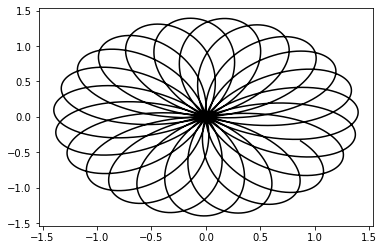

In [29]:
plt.plot(np.real(z),np.imag(z),'k-')

# <font color='red'> Runge-Kutta Method <font>

## It is an approximation for solving $\frac{dy}{dt}=f(t,y), y(t_0)=y_0$
## The equations are 
## $t_{n+1}=t_n+h$ and
## $y_{n+1}=y_n+\frac{h}{6}(k_1+2k_2+2k_3+k_4)$
## Here $k_1=f(t_n,y_n)$, $k_2=f(t_n+\frac{h}{2},y_n+\frac{hk_1}{2})$, $k_3=f(t_n+\frac{h}{2},y_n+\frac{hk_2}{2})$ and $k_4=f(t_n+h,y_n+hk_3)$

# Implement RK2, RK4 and RK6 methods on Python. Show it to your TAs the relationship between error rate and time of execution